# Case Ifood

# Installs

In [ ]:
!pip install numba==0.54.1 -q
!pip install pycaret==3.0.4
!pip install shap

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.54.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import matplotlib.pyplot as plt

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FIAP/Inteligencia_Artificial_Tecnologo/2_ano/Front End & Mobile Development/Case Ifood/CP1/data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


#Dicionário das colunas do DataFrame

    - 'ID': 'Identificação',
    - 'Year_Birth': 'Ano_Nascimento',
    - 'Education': 'Educação',
    - 'Marital_Status': 'Estado_Civil',
    - 'Income': 'Renda',
    - 'Kidhome': 'Filhos_Menores',
    - 'Teenhome': 'Adolescentes_Casa',
    - 'Dt_Customer': 'Data_Cliente',
    - 'Recency': 'Recência',
    - 'MntWines': 'Gasto_Vinhos',
    - 'MntFruits': 'Gasto_Frutas',
    - 'MntMeatProducts': 'Gasto_Carne',
    - 'MntFishProducts': 'Gasto_Peixe',
    - 'MntSweetProducts': 'Gasto_Doces',
    - 'MntGoldProds': 'Gasto_Ouro',
    - 'NumDealsPurchases': 'Num_Compras_Descontos',
    - 'NumWebPurchases': 'Num_Compras_Web',
    - 'NumCatalogPurchases': 'Num_Compras_Catálogo',
    - 'NumStorePurchases': 'Num_Compras_Lojas',
    - 'NumWebVisitsMonth': 'Num_Visitas_Mensal_Web',
    - 'AcceptedCmp3': 'Aceitou_Campanha3',
    - 'AcceptedCmp4': 'Aceitou_Campanha4',
    - 'AcceptedCmp5': 'Aceitou_Campanha5',
    - 'AcceptedCmp1': 'Aceitou_Campanha1',
    - 'AcceptedCmp2': 'Aceitou_Campanha2',
    - 'Complain': 'Reclamação',
    - 'Z_CostContact': 'Custo_Contato',
    - 'Z_Revenue': 'Receita_Esperada',
    - 'Response': 'Resposta'



# Data Cleaning

Drop da feature ID por ser um identificador

In [ ]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [ ]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
dtype: int64

In [ ]:
columns = df.columns
linhas_iguais = df.duplicated(subset=columns)
contagem = linhas_iguais.value_counts()
df_contagem = pd.DataFrame({'Valores Iguais': contagem.index, 'Contagem': contagem.values})
df_contagem


,Valores Iguais,Contagem
0,False,2058
1,True,182


In [ ]:
columns = df.columns
linhas_iguais = df[df.duplicated(subset=columns, keep=False)]
linhas_iguais.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
17,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
23,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,3,11,0
24,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,3,11,0
29,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0


In [ ]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [ ]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [ ]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

0    23
1     1
Name: Response, dtype: int64

In [ ]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
# Proporção de 0 e 1 da fetaure Response no df completo
df.Response.value_counts(normalize = True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [ ]:
percent_nan = np.round((df['Income'].isna().sum() / len(df)) * 100, 2)
percent_nan_response_1 = np.round(((len(df[(df['Income'].isna()) & (df['Response'] == 1)]) / len(df)) * 100), 2)
print('% amostras com NaN: ', percent_nan)
print('% amostras com NaN e Response = 1: ', percent_nan_response_1)

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [ ]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


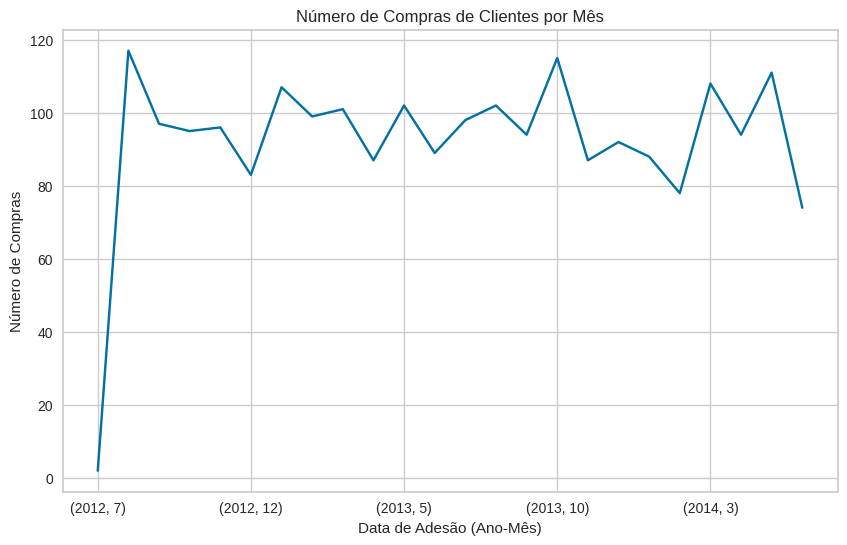

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month

compras_mes = df.groupby(['Year', 'Month']).size()
plt.figure(figsize=(10, 6))
compras_mes.plot()
plt.title('Número de Compras de Clientes por Mês')
plt.xlabel('Data de Adesão (Ano-Mês)')
plt.ylabel('Número de Compras')
plt.grid(True)
plt.show()

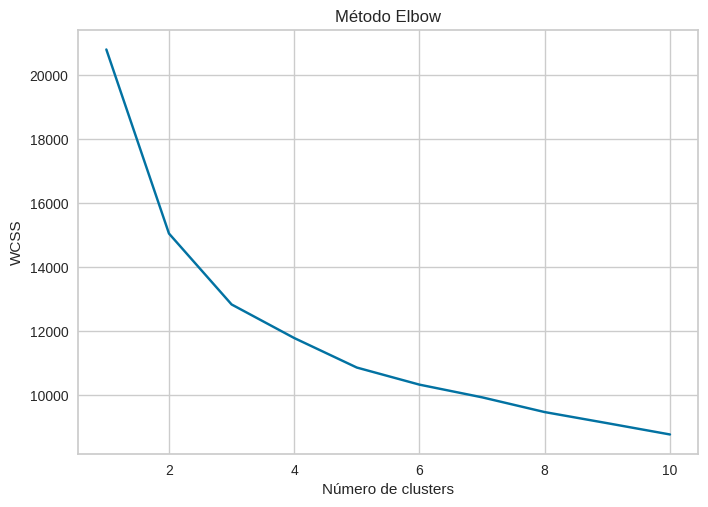

           Year_Birth        Income   Kidhome  Teenhome    Recency  \
Segmento                                                             
0         1968.331606  50124.310881  0.880829  0.880829  49.507772   
1         1968.133981  77964.782524  0.048544  0.040777  49.267961   
2         1972.068182  33111.583333  0.820346  0.401515  48.872294   
3         1964.448630  60546.148973  0.044521  0.955479  48.845890   

            MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Segmento                                                            
0         310.984456  15.455959       127.455959        24.585492   
1         594.871845  62.200000       454.398058        92.877670   
2          32.636364   5.410173        21.377706         7.666667   
3         478.678082  31.489726       157.013699        40.657534   

          MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Segmento                                                                       
0   

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

variaveis_numericas = [ 'Income', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
variaveis_categoricas = ['Education', 'Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variaveis_numericas),
        ('cat', OneHotEncoder(), variaveis_categoricas)])
df_transformado = preprocessor.fit_transform(df)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_transformado)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(df_transformado)

df['Segmento'] = kmeans.labels_
analise_segmentos = df.groupby('Segmento').mean()
print(analise_segmentos)

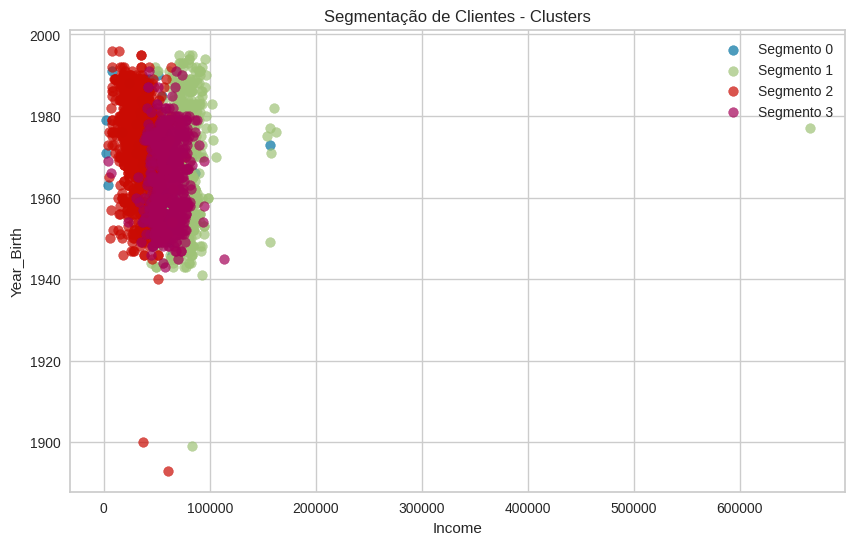

In [ ]:
x= 'Income'
y= 'Year_Birth'

plt.figure(figsize=(10, 6))
for cluster in sorted(df['Segmento'].unique()):
    plt.scatter(df[df['Segmento'] == cluster][x],
                df[df['Segmento'] == cluster][y],
                label=f'Segmento {cluster}', alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.title('Segmentação de Clientes - Clusters')
plt.legend()
plt.grid(True)
plt.show()


###Quis analisar essas linhas que tem uma idade muito elevada e decidi retirá-las

In [ ]:
df[df['Year_Birth'] < 1940]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Segmento
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,2013,9,2
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,2014,5,2
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,2013,9,1


In [ ]:
df.drop(df[df['Year_Birth'] < 1940].index)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Segmento
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,9,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,3,2
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,1
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,2,2
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013,6,3
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014,6,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014,1,1
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014,1,3


## Ajuste do dtypes

In [ ]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

Year_Birth                      Int64
Education                      string
Marital_Status                 string
Income                          Int64
Kidhome                         Int64
Teenhome                        Int64
Dt_Customer            datetime64[ns]
Recency                         Int64
MntWines                        Int64
MntFruits                       Int64
MntMeatProducts                 Int64
MntFishProducts                 Int64
MntSweetProducts                Int64
MntGoldProds                    Int64
NumDealsPurchases               Int64
NumWebPurchases                 Int64
NumCatalogPurchases             Int64
NumStorePurchases               Int64
NumWebVisitsMonth               Int64
AcceptedCmp3                    Int64
AcceptedCmp4                    Int64
AcceptedCmp5                    Int64
AcceptedCmp1                    Int64
AcceptedCmp2                    Int64
Complain                        Int64
Response                        Int64
Year        

# Feature Engineering

## Idade dos clientes

In [ ]:
from datetime import datetime
ano_atual = pd.datetime.now().year
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth',axis = 1, inplace = True, errors = 'ignore')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Segmento,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,9,1,67
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,3,2,70
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,1,59
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,2,2,40
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,0,43


## Tempo como cliente

In [ ]:
dt = pd.datetime.now().date()
df['Time_Customer'] = dt - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(1, 'Y')
print(df[['Dt_Customer','Time_Customer']].head())
df.drop('Dt_Customer',axis = 1, inplace = True)

  Dt_Customer  Time_Customer
0  2012-09-04      11.597774
1  2014-03-08      10.091925
2  2013-08-21      10.636769
3  2014-02-10      10.163111
4  2014-01-19      10.223345


## Estatística Básica

### Variáveis Numéricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.0,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.0,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
MntWines,2216.0,305.091606,337.32792,0.0,24.0,174.5,505.0,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.0,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.0,321.0


### Variáveis Categóricas

In [ ]:
df.describe(include = 'string')

,Education,Marital_Status
count,2216,2216
unique,5,8
top,Graduation,Married
freq,1116,857


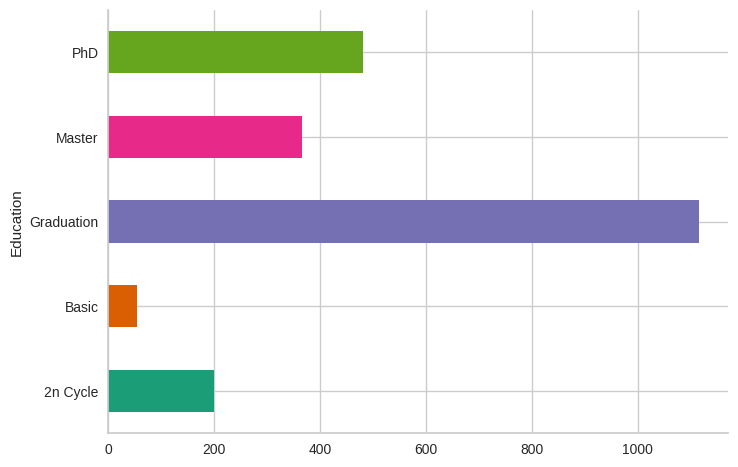

In [ ]:
import seaborn as sns
df.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.Education.value_counts(normalize = True)

Graduation     0.50361
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: Float64

In [ ]:
df.Marital_Status.value_counts(normalize = True)

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: Float64

### Removendo valores incoerentes com a variável Marital_Status

In [ ]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: Int64

In [ ]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'Month',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Segmento',
       'Teenhome', 'Time_Customer', 'Year', 'Response'],
      dtype='object')

## Quantidade de response =0 ou =1 entre cada variável categórica

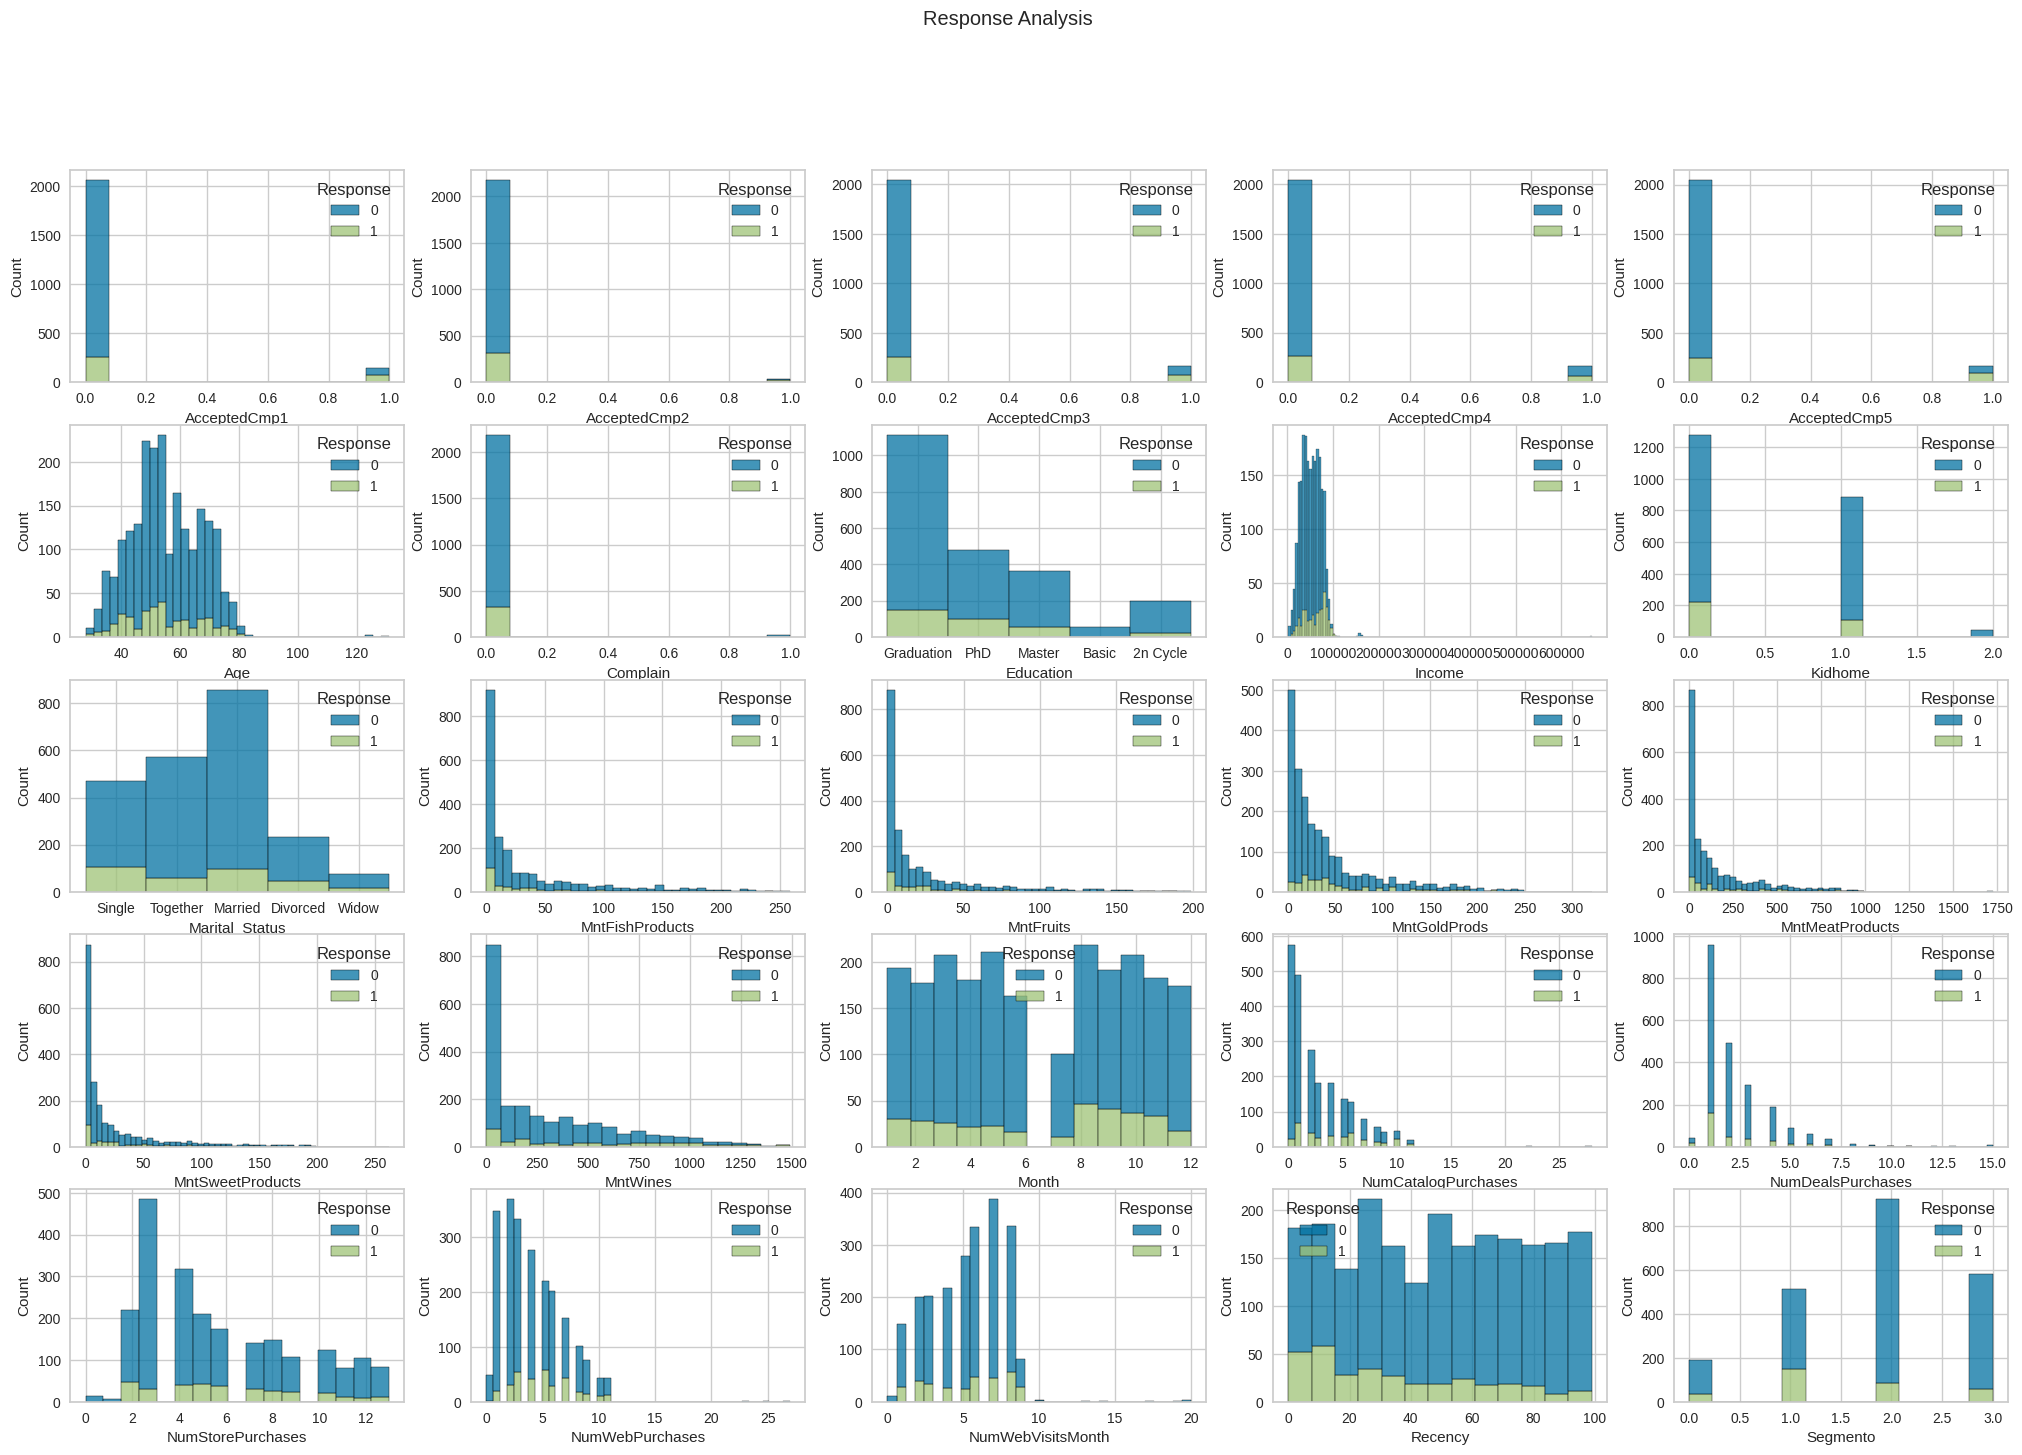

In [ ]:
columns = df.columns
fig, axes = plt.subplots(5, 5, figsize=(25, 16), sharey=False)
fig.suptitle('Response Analysis')

feature=0
for row in range(0,5):
  for col in range(0,5):
    sns.histplot(ax=axes[row, col], data=df, x=cols[feature], hue="Response", multiple="stack")
    feature += 1

## Proporção (relativa) de response=0 e response = 1 entre cada variável categórica

### Separando o dataset em dois: Response ==0 e ==1

In [ ]:
df0 = df[df.Response == 0]
df1 = df[df.Response == 1]

### Separando o dataset em dois: Response ==0 e ==1

In [ ]:
cols_cat = ['Complain','Education','Kidhome','Marital_Status','Teenhome',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
for x in cols_cat:
  print(x)
  print(f'Resp 0\n{df0[x].value_counts(normalize = True)}\n')
  print(f'Resp 1\n{df1[x].value_counts(normalize = True)}\n')
  print('#'*50)

Complain
Resp 0
0    0.99042
1    0.00958
Name: Complain, dtype: Float64

Resp 1
0    0.990909
1    0.009091
Name: Complain, dtype: Float64

##################################################
Education
Resp 0
Graduation    0.512507
PhD           0.201703
Master        0.163385
2n Cycle      0.094731
Basic         0.027674
Name: Education, dtype: Float64

Resp 1
Graduation    0.457576
PhD                0.3
Master        0.169697
2n Cycle      0.066667
Basic         0.006061
Name: Education, dtype: Float64

##################################################
Kidhome
Resp 0
0     0.56413
1    0.412453
2    0.023417
Name: Kidhome, dtype: Float64

Resp 1
0    0.663636
1    0.330303
2    0.006061
Name: Kidhome, dtype: Float64

##################################################
Marital_Status
Resp 0
Married     0.403938
Together    0.273018
Single      0.194252
Divorced    0.097924
Widow       0.030867
Name: Marital_Status, dtype: Float64

Resp 1
Single      0.321212
Married      0.29697
Toge

In [ ]:
df0 = df[df.Response == 0]
df1 = df[df.Response == 1]

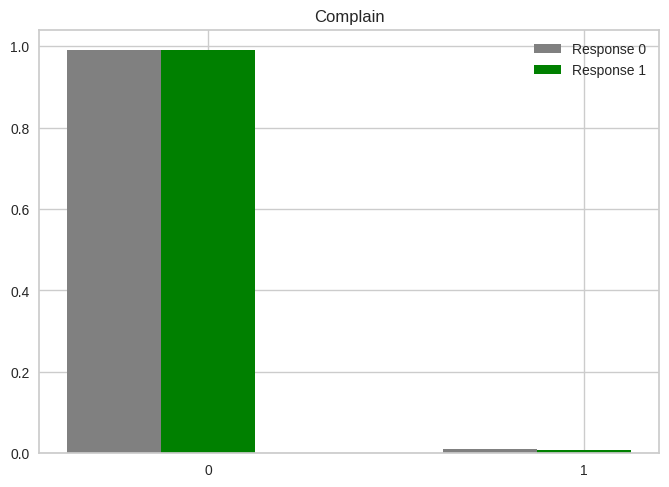

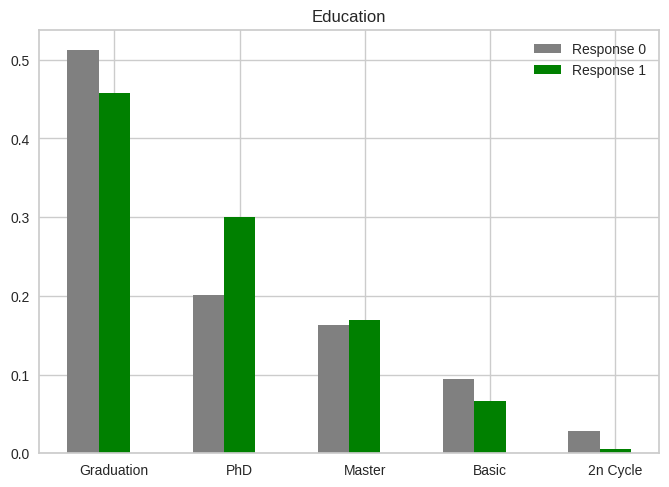

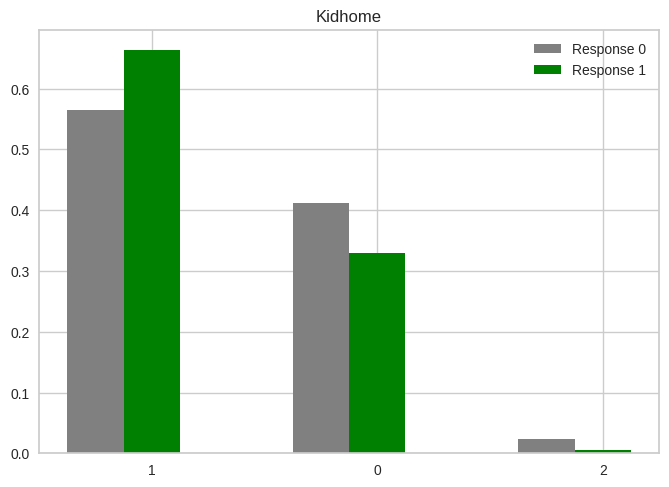

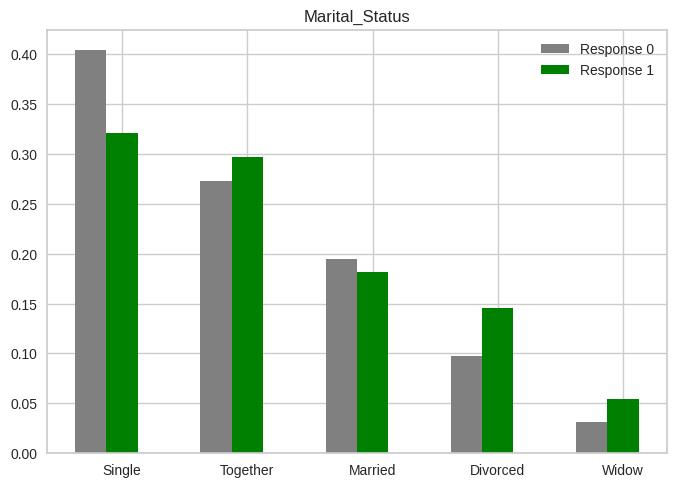

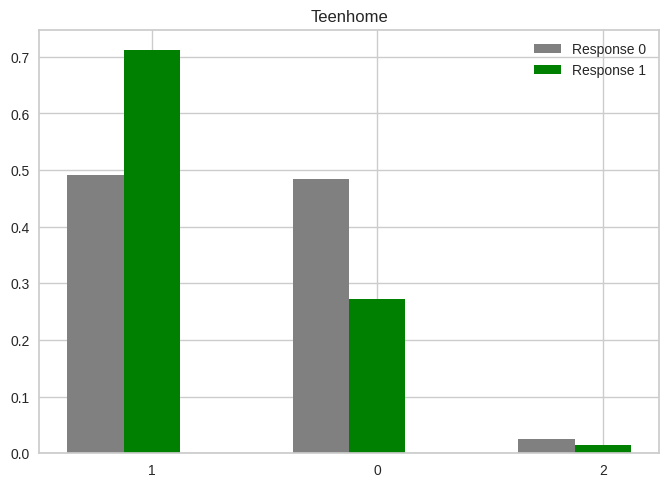

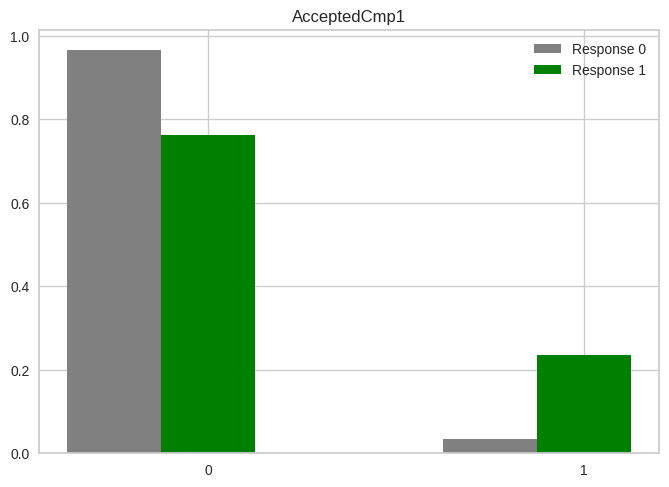

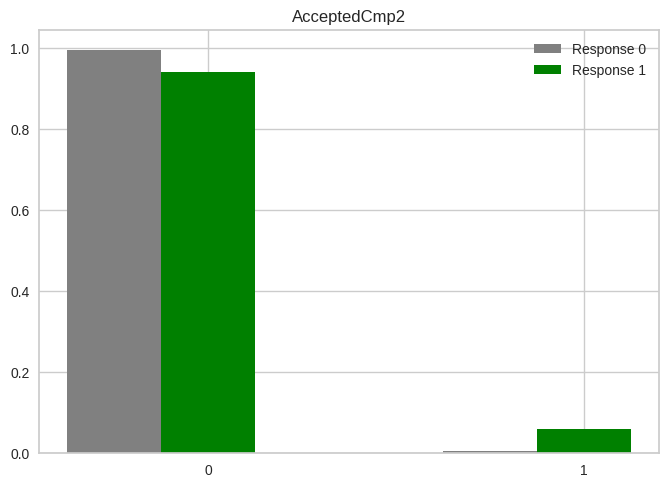

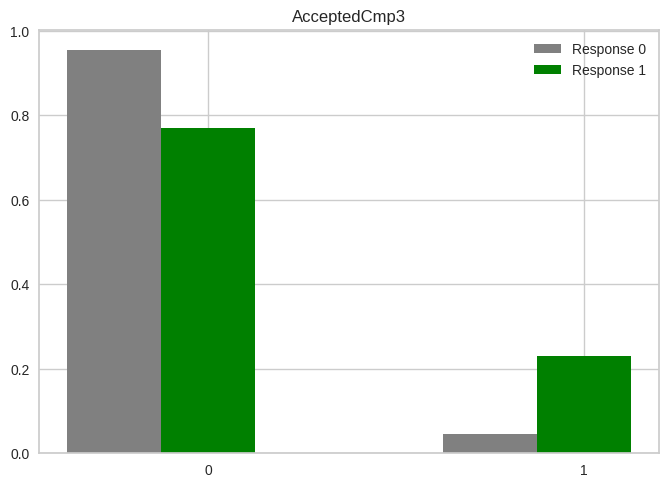

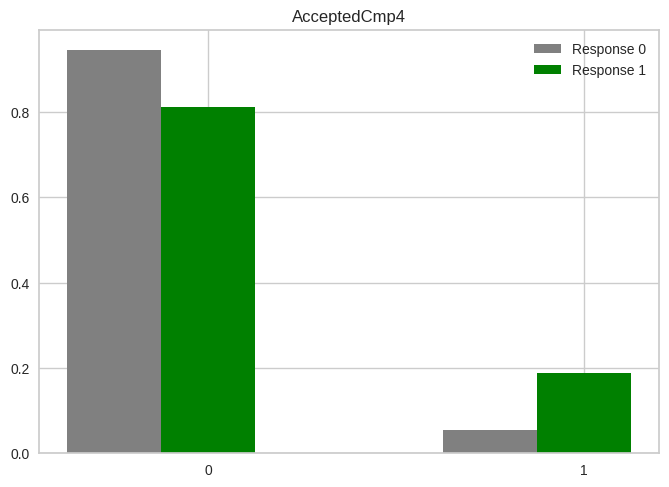

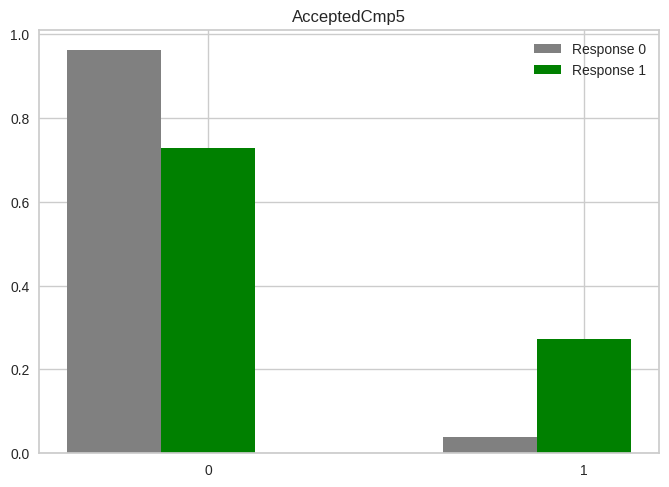

In [ ]:
for x in cols_cat:
  x1 = df0[x].unique()
  x2 = df1[x].unique()
  y1 = df0[x].value_counts(normalize = True)
  y2 = df1[x].value_counts(normalize = True)

  # set width of bar
  barWidth = 0.25

  # Set position of bar on X axis
  pos1 = np.arange(len(y1))
  pos2 = [x + barWidth for x in pos1]

  # Make the plot
  plt.title (f'{x}')
  plt.bar(pos1, y1, color='grey', width=barWidth, label='Response 0')
  plt.bar(pos2, y2, color='green', width=barWidth, label='Response 1')

  # Add xticks on the middle of the group bars
  plt.xticks([i + barWidth for i in range(len(df0[x].unique()))], df0[x].unique())

  # Create legend & Show graphic
  plt.legend()
  plt.show()
  np.arange(len(df0[x].unique()))
  print('')

# Análise de Perfil dos Clientes com maior tendencia a conversão

Breve análise sobre o perfil dos clientes que converteram na Campanha #6 (Response = 1):
1. Entre os Complain 0/1 não há diferença siginificativa em termos de conversão;
2. Em relação a Educação, a conversão foi maior entre aqueles que possuem PhD;
3. Maior conversão entre aqueles que têm 1 criança ou 1 adolescente em casa;
4. Maior conversão entre aqueles que declararam estado civil "Together", "Divorciado" e "Viúvos".
5. Maior conversão entre os que aceitaram a oferta em pelo menos uma das 5 campanhas anteriores
6. Algumas colunas estavam com valores iguais, o que pode induzir o modelo
7. 3 Clientes tinham mais de 100 anos, uma baixa quantidade, mas que poderia  mudar um pouco a média da idade

## Preparação do dataset para Modelagem

## Dummizando as features categoricas

In [ ]:
X = df.drop('Response', axis = 1)
y = df['Response']

cols_string = X.select_dtypes(include = 'string').columns

X = pd.get_dummies(X, columns = cols_string, drop_first = True).convert_dtypes()
X.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,Month,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Segmento,Teenhome,Time_Customer,Year,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,0,0,0,0,67,0,58138,0,172,88,88,546,88,635,9,10,3,4,8,7,58,1,0,11.597774,2012,0,1,0,0,0,1,0,0
1,0,0,0,0,0,70,0,46344,1,2,1,6,6,1,11,3,1,2,2,1,5,38,2,1,10.091925,2014,0,1,0,0,0,1,0,0
2,0,0,0,0,0,59,0,71613,0,111,49,42,127,21,426,8,2,1,10,8,4,26,1,0,10.636769,2013,0,1,0,0,0,0,1,0
3,0,0,0,0,0,40,0,26646,1,10,4,5,20,3,11,2,0,2,4,2,6,26,2,0,10.163111,2014,0,1,0,0,0,0,1,0
4,0,0,0,0,0,43,0,58293,1,46,43,15,118,27,173,1,3,5,6,5,5,94,0,0,10.223345,2014,0,0,0,1,1,0,0,0



## Train Test Split

In [ ]:
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)

print('Dados para treino: ' + str(df_train_test.shape))
print('Dados para teste: ' + str(df_valid.shape))

Dados para treino: (2099, 29)
Dados para teste: (110, 29)


* A partir daqui serão testados diferentes modelos com diferentes combinações de hiperparâmetros para verificar qual apresenta melhor métrica de classificação.
**Para o problema de negócio em questão, a métrica Precision é a mais relevante, no entanto, afim de eleger o melhor modelo independentemente do treshold definido, será considerado o AUC como métrica principal.**

###Preparando o ambiente

In [ ]:
s = setup(data = df_train_test,
          target = 'Response',
          fix_imbalance = True,
          remove_outliers = True,
          categorical_features = ['Education', 'Marital_Status'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 29)"
4,Transformed data shape,"(3070, 37)"
5,Transformed train set shape,"(2440, 37)"
6,Transformed test set shape,"(630, 37)"
7,Numeric features,26
8,Categorical features,2
9,Preprocess,True


###Exibição de modelos

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Identificando o melhor modelo

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8897,0.8980,0.4658,0.7065,0.5578,0.4982,0.5142,1.7330
et,Extra Trees Classifier,0.8856,0.8689,0.3798,0.7361,0.4947,0.4386,0.4721,1.0810
rf,Random Forest Classifier,0.8809,0.8816,0.3617,0.7057,0.4733,0.4147,0.4465,1.3910
xgboost,Extreme Gradient Boosting,0.8761,0.8857,0.4613,0.6267,0.5255,0.4568,0.4671,1.0420
lightgbm,Light Gradient Boosting Machine,0.8761,0.8868,0.3937,0.6566,0.4834,0.4191,0.4413,1.3470
ada,Ada Boost Classifier,0.8673,0.8735,0.5700,0.5646,0.5642,0.4863,0.4881,1.0450
dummy,Dummy Classifier,0.8496,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2620
dt,Decision Tree Classifier,0.8196,0.6563,0.4073,0.4079,0.4037,0.2984,0.3004,0.4650
lda,Linear Discriminant Analysis,0.8142,0.8981,0.8146,0.4390,0.5692,0.4645,0.5015,0.4090
ridge,Ridge Classifier,0.8087,0.0000,0.8144,0.4330,0.5640,0.4569,0.4948,0.5510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


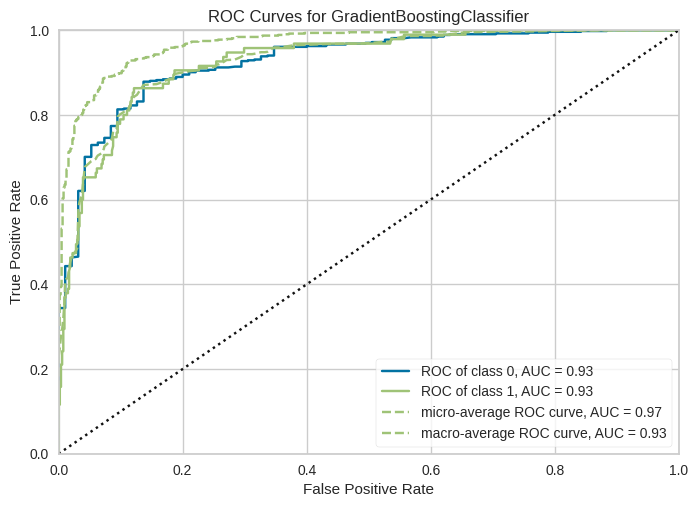

In [ ]:
plot_model(best_model, plot='auc')

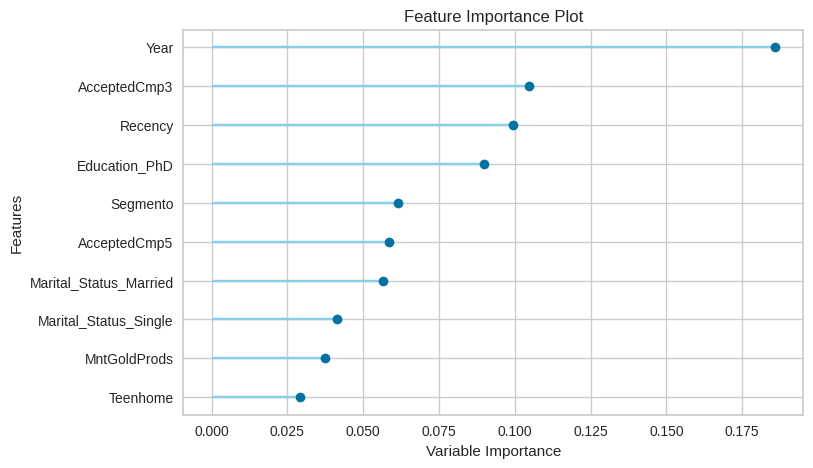

In [ ]:
plot_model(best_model, plot='feature')

### Modelo escolhido para ser criado: Extra Trees Classifier

In [ ]:
mdl_et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8639,0.8847,0.2727,0.6000,0.3750,0.3105,0.3411
1,0.9116,0.9024,0.5455,0.8000,0.6486,0.6001,0.6145
2,0.8639,0.8282,0.2727,0.6000,0.3750,0.3105,0.3411
3,0.8639,0.8476,0.4091,0.5625,0.4737,0.3978,0.4044
4,0.8912,0.9015,0.4091,0.7500,0.5294,0.4738,0.5017
5,0.8639,0.8082,0.3636,0.5714,0.4444,0.3713,0.3836
6,0.8639,0.8716,0.2727,0.6000,0.3750,0.3105,0.3411
7,0.8776,0.8007,0.3182,0.7000,0.4375,0.3795,0.4168
8,0.8912,0.8855,0.3913,0.8182,0.5294,0.4764,0.5180


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(mdl_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [ ]:
tuned_et = tune_model(mdl_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.7927,0.4545,0.4000,0.4255,0.3167,0.3177
1,0.8912,0.9047,0.6818,0.6250,0.6522,0.5878,0.5886
2,0.8844,0.8844,0.7273,0.5926,0.6531,0.5845,0.5890
3,0.8571,0.8720,0.6364,0.5185,0.5714,0.4868,0.4905
4,0.9048,0.9116,0.5000,0.7857,0.6111,0.5599,0.5785
5,0.8231,0.8516,0.4545,0.4167,0.4348,0.3302,0.3306
6,0.8503,0.8778,0.4545,0.5000,0.4762,0.3891,0.3897
7,0.8707,0.8844,0.5909,0.5652,0.5778,0.5015,0.5017
8,0.8912,0.8860,0.5217,0.7059,0.6000,0.5386,0.5469


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Análise do predict do modelo
predict_model(mdl_et, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8937,0.8973,0.4737,0.7258,0.5732,0.5156,0.5309


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumWebVisitsMonth,Recency,Segmento,Teenhome,Time_Customer,Year,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,67786,0,...,1,0,1,0,10.341075,2013,1,1,0.490,0.510
1782,0,0,0,0,0,60,0,PhD,31686,1,...,6,31,2,1,9.848251,2014,0,0,1.000,0.000
1944,0,0,0,0,0,74,0,PhD,59292,0,...,3,71,3,1,10.825685,2013,0,0,1.000,0.000
1670,0,0,1,0,0,54,0,PhD,38097,1,...,7,70,2,1,11.485520,2012,1,1,0.315,0.685
1219,0,0,0,0,0,48,0,Master,49681,0,...,7,66,0,2,10.431426,2013,0,0,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,37085,1,...,8,65,2,1,9.790755,2014,0,0,1.000,0.000
1923,1,0,0,0,0,59,0,Graduation,81168,0,...,3,84,1,0,9.927650,2014,0,0,0.910,0.090
1523,0,0,0,0,0,46,0,2n Cycle,52195,2,...,8,2,2,1,9.913961,2014,0,0,0.965,0.035
641,0,0,0,0,0,55,0,Graduation,4428,0,...,1,0,3,1,10.513563,2013,0,0,0.900,0.100


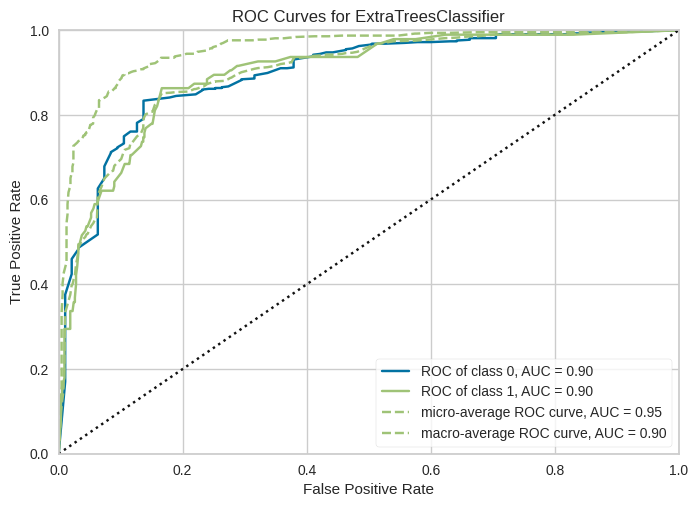

In [ ]:
plot_model(tuned_et, plot = 'auc')

### Análise da importância de cada feature e Matrix de Confusão, respectivamente

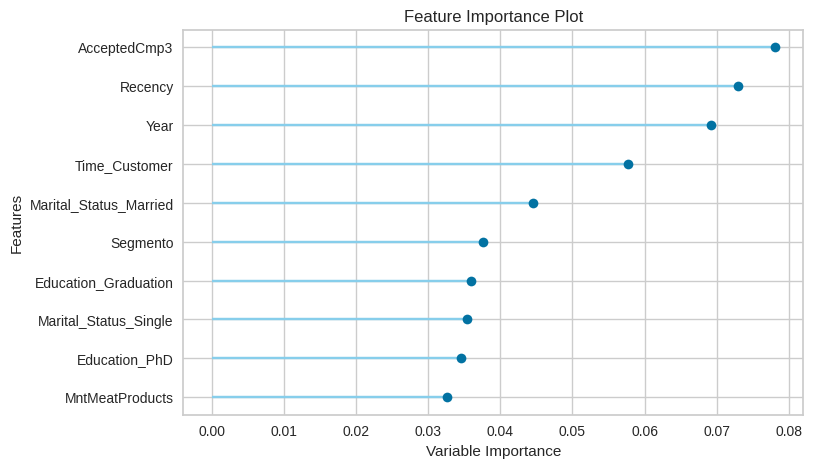

In [ ]:
plot_model(tuned_et, plot = 'feature')

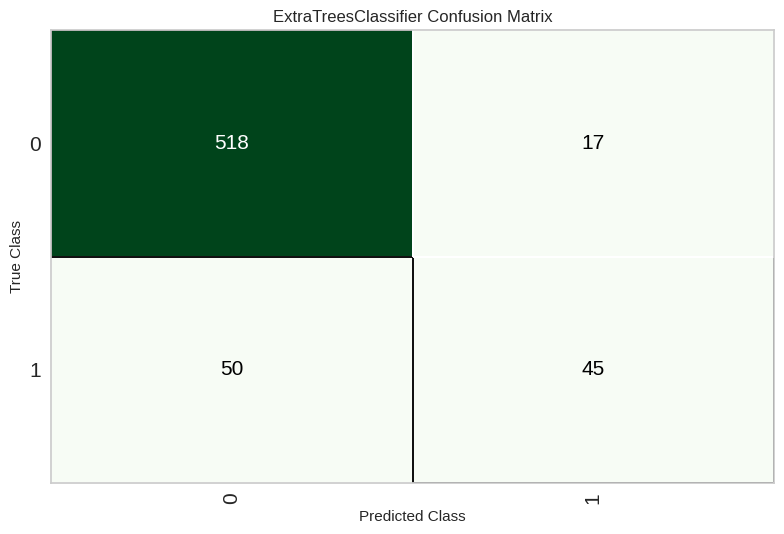

In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

### Salvando o modelo e base de teste

In [ ]:
save_model(tuned_et, './pickle_et_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AcceptedCmp1', 'AcceptedCmp2',
                                              'AcceptedCmp3', 'AcceptedCmp4',
                                              'AcceptedCmp5', 'Age', 'Complain',
                                              'Income', 'Kidhome',
                                              'MntFishProducts', 'MntFruits',
                                              'MntGoldProds', 'MntMeatProducts',
                                              'MntSweetProducts', 'MntWines',
                                              'Month', 'NumCatalogPurchases...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                

In [ ]:
cols_x_test = get_config(variable="X_test").columns
df_valid.drop('Response', axis = 1).to_csv('Xtest.csv', index = False)
df_valid

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Segmento,Teenhome,Time_Customer,Year,Response
0,0,0,0,0,0,40,0,Graduation,26646,1,...,2,4,2,6,26,2,0,10.163111,2014,0
1,0,0,0,0,0,78,0,Graduation,37760,0,...,2,6,4,7,20,2,0,11.608726,2012,0
2,0,0,0,0,0,39,0,Master,20559,1,...,2,3,2,8,88,2,0,11.080310,2013,0
3,0,0,0,0,0,67,0,Graduation,65486,0,...,1,10,4,2,29,3,1,9.913961,2014,0
4,0,0,0,0,0,60,0,Master,79143,0,...,1,13,6,3,2,1,0,11.663484,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,46,0,Basic,26487,1,...,3,3,2,5,23,2,0,10.891394,2013,0
106,0,0,0,0,0,41,0,Master,89616,0,...,1,12,7,2,36,1,0,11.121378,2013,1
107,0,0,0,0,0,77,0,Graduation,27469,0,...,1,3,0,6,2,2,0,11.688125,2012,0
108,0,0,0,0,0,29,0,2n Cycle,80617,0,...,1,8,4,2,42,1,0,11.493734,2012,0
